In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



Importing the wine dataset 

In [2]:
wine_df=pd.read_csv('/content/winequalityN.csv')
wine_df.shape

(6497, 13)

In [3]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Checking for missing values

In [4]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
wine_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
wine_df.dropna(inplace=True)

In [7]:
wine_df.sort_values(by=['quality'])

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6376,red,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
5588,red,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
5357,red,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
3810,white,6.8,0.260,0.34,15.10,0.060,42.0,162.0,0.99705,3.24,0.52,10.5,3
1229,white,8.3,0.330,0.42,1.15,0.033,18.0,96.0,0.99110,3.20,0.32,12.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,white,7.1,0.260,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9
827,white,7.4,0.240,0.36,2.00,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,white,6.9,0.360,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
820,white,6.6,0.360,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9


In [8]:
wine_df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

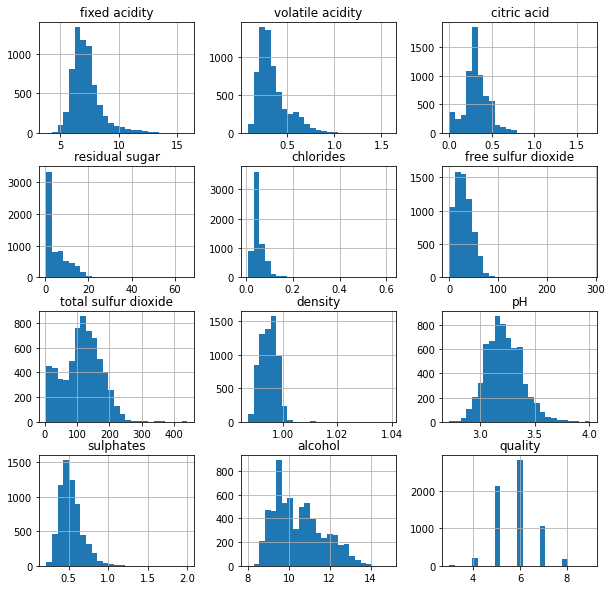

In [9]:
wine_df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

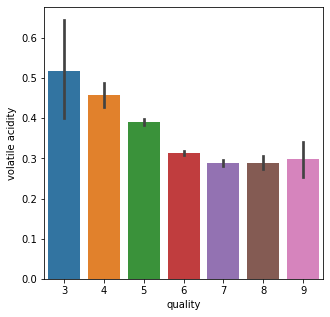

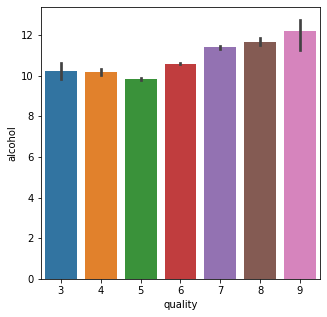

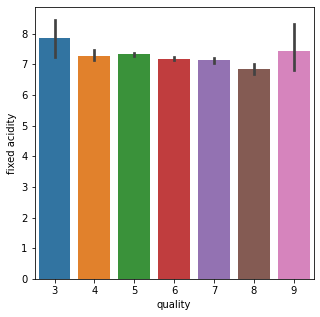

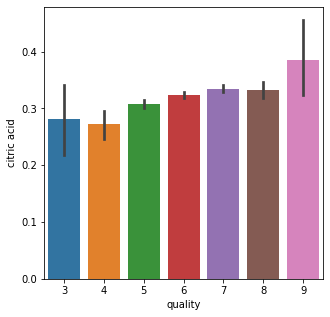

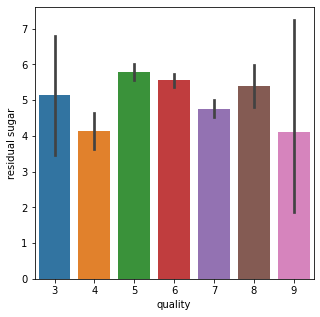

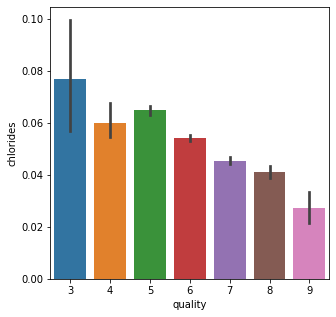

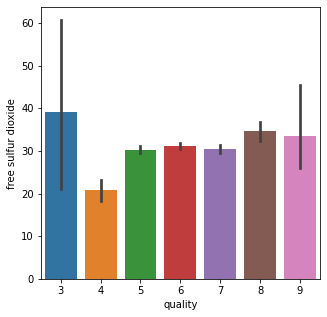

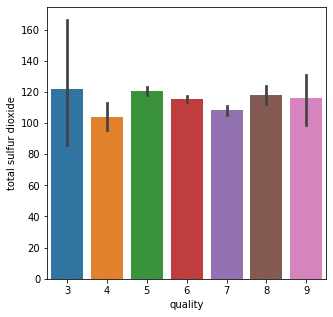

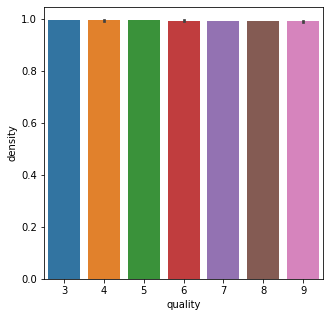

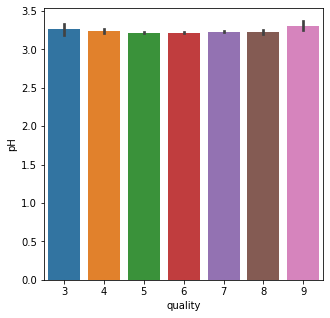

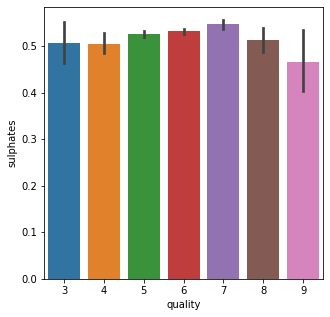

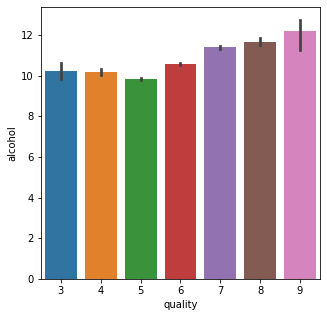

In [10]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data= wine_df)
plot1 = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='alcohol', data= wine_df)
plot2 = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='fixed acidity', data= wine_df)
plot3 = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data= wine_df)
plot4 = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data= wine_df)
plot5 = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides', data= wine_df)
plot6 = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data= wine_df)
plot7 = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='total sulfur dioxide', data= wine_df)
plot8 = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='density', data= wine_df)
plot9 = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='pH', data= wine_df)
plot10 = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='sulphates', data= wine_df)
plot11 = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='alcohol', data= wine_df)

The null values are filled with interpolate function


In [11]:
#wine_df.interpolate(method ='linear', limit_direction ='backward', inplace=True)
#wine_df.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [12]:
wine_df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Correlation of each feature 

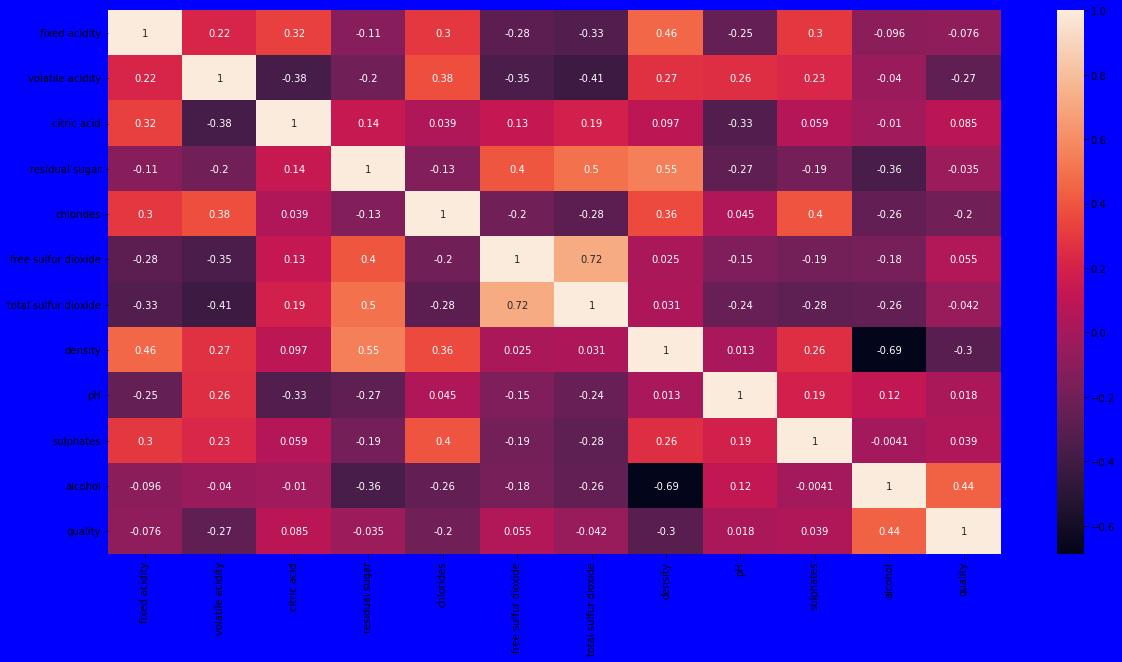

In [13]:
plt.figure(figsize=[20,10],facecolor='blue')
sns.heatmap(wine_df.corr(),annot=True)

In [14]:
for a in range(len(wine_df.corr().columns)):
    for b in range(a):
        if abs(wine_df.corr().iloc[a,b]) >0.7:
            name = wine_df.corr().columns[a]
            print(name)

total sulfur dioxide


Since Total Sulfur Dioxide is highly correlated, the feature is removed 

In [15]:
nwine_df=wine_df.drop('total sulfur dioxide',axis=1)
nwine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


The categorical variable type is been replaced using get.dummies function
so a new column 'Type' is created so that White wine is shown as 1 and redwine is shown as 0

In [16]:
wines_df = pd.get_dummies(nwine_df,drop_first=True)
wines_df.rename(columns = {'type_white':'Type'}, inplace = True)
wines_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


In [17]:
Y=wines_df['quality'].apply(lambda Y_value: 1 if Y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality, Length: 6463, dtype: int64

The quality is a binary value now, quality above 7 is labelled 1(good) below 7 is labelled 0(bad)

In [18]:
X=wines_df.drop(['quality'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

In [19]:
print( Y_train.shape, Y_test.shape, X_train.shape, X_test.shape)

(4847,) (1616,) (4847, 11) (1616, 11)


In [20]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(X_train)
new_xtrain = norm_fit.transform(X_train)
new_xtest = norm_fit.transform(X_test)
# display values
print(new_xtrain)
print(new_xtest)

[[0.24166667 0.1        0.25203252 ... 0.23595506 0.42028986 1.        ]
 [0.25       0.21333333 0.13821138 ... 0.15168539 0.20289855 1.        ]
 [0.25833333 0.1        0.32520325 ... 0.23033708 0.44927536 0.        ]
 ...
 [0.19166667 0.16666667 0.23577236 ... 0.23595506 0.2173913  1.        ]
 [0.29166667 0.14666667 0.39837398 ... 0.20224719 0.24637681 1.        ]
 [0.25833333 0.36       0.06504065 ... 0.1741573  0.14492754 0.        ]]
[[0.15833333 0.02666667 0.17073171 ... 0.06179775 0.49275362 1.        ]
 [0.375      0.12666667 0.37398374 ... 0.20786517 0.23188406 1.        ]
 [0.225      0.13666667 0.39837398 ... 0.17977528 0.13043478 1.        ]
 ...
 [0.125      0.25333333 0.12195122 ... 0.30898876 0.7826087  1.        ]
 [0.225      0.18666667 0.23577236 ... 0.21910112 0.63768116 1.        ]
 [0.14166667 0.02666667 0.26829268 ... 0.05617978 0.71014493 1.        ]]


In [21]:
new_xtest

array([[0.15833333, 0.02666667, 0.17073171, ..., 0.06179775, 0.49275362,
        1.        ],
       [0.375     , 0.12666667, 0.37398374, ..., 0.20786517, 0.23188406,
        1.        ],
       [0.225     , 0.13666667, 0.39837398, ..., 0.17977528, 0.13043478,
        1.        ],
       ...,
       [0.125     , 0.25333333, 0.12195122, ..., 0.30898876, 0.7826087 ,
        1.        ],
       [0.225     , 0.18666667, 0.23577236, ..., 0.21910112, 0.63768116,
        1.        ],
       [0.14166667, 0.02666667, 0.26829268, ..., 0.05617978, 0.71014493,
        1.        ]])

In [22]:
model=RandomForestClassifier(n_estimators = 100).fit(new_xtrain,Y_train)


In [23]:
y_pred=model.predict(new_xtest)


In [24]:
score=accuracy_score(Y_test,y_pred)
score

0.8768564356435643